In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt 
import random

In [2]:
m = [1, 2]
k_B = 1
v = [[1,1.5],[1.5,2]]
n = [2, 1]
T = [[1], [2]]
u = [[np.array([[-1],[0],[0]])], [np.array([[1],[0],[0]])]]
num = 5
time = 3
dt = 0.3

In [3]:
rho = [m[i-1]*n[i-1] for i in range(1,3)]

In [4]:
def f0(i, v):
    i -= 1
    return n[i]*((m[i]/(2 * math.pi * k_B * T[i][0])) ** 1.5) * math.exp(-m[i] * (np.linalg.norm(v - u[i][0]))**2 / (2*k_B*T[i][0]))

In [50]:
def momentum(i, v_all, t):
    ans = 0
    for v in range(len(v_all)):
        ans += v_all[v]  * f[i-1][t][v] * (8/(num-1))**3
    return ans*m[i-1]

def velocity(i, t):
    return momentum(i, v_all, t)/rho[i-1]

def Ei(i, v_all, t):
    ans = 0
    for v in range(len(v_all)):
        ans += 0.5 * (np.linalg.norm(v_all[v] - velocity(i, t)))**2 * f[i-1][t][v] * (8/(num-1))**3
    return ans*m[i-1]

def temperature(i, t):
    return 2*m[i-1]*Ei(i, v_all, t)/(3*k_B*rho[i-1])

def u_ij(i, j, t):    
    return (rho[i-1]*v[i-1][j-1]*velocity(i, t)+rho[j-1]*v[j-1][i-1]*velocity(j,t))/(rho[i-1]*v[i-1][j-1]+rho[j-1]*v[j-1][i-1])

def T_ij(i, j, t):
    i -= 1
    j -= 1
    ans1 = (n[i]*v[i][j]*temperature(i+1,t)+n[j]*v[j][i]*temperature(j+1,t))/(n[i]*v[i][j]+n[j]*v[j][i])
    ans2 = (rho[i]*v[i][j]*((np.linalg.norm(velocity(i+1, t)))**2-(np.linalg.norm(u_ij(i+1, j+1, t)))**2)+\
    rho[j]*v[j][i]*((np.linalg.norm(velocity(j+1, t)))**2-(np.linalg.norm(u_ij(i+1, j+1, t)))**2))/(3*n[i]*v[i][j]+3*n[j]*v[j][i])
    ans = ans1+ans2
    
    if ans > 1e-4:
        return ans
    else:
        return 0.5
    
def feq(i, j, v, t):
    i -= 1
    j -= 1
    return n[i]*(m[i]/(2*math.pi*k_B*T_ij(i+1, j+1, t)))**1.5 * math.exp(-m[i]*(np.linalg.norm(v - u_ij(i+1, j+1, t)))**2 / (2*k_B*T_ij(i,j,t)))

In [51]:
v_all = []
for i in np.linspace(-4,4,num):
    for j in np.linspace(-4,4,num):
        for k in np.linspace(-4,4,num):
            v_all.append(np.array([[i],[j],[k]]))


In [52]:
#f[][][]:gas id-time-v id
f=np.zeros((2,int(time/dt)+1,num**3))
f.tolist()

for i in range(len(v_all)):
    f[0][0][i] = f0(1, v_all[i])
    f[1][0][i] = f0(2, v_all[i])

In [53]:
df=[0,0]
for t in range(0,10):
    
    for i in range(len(v_all)):
        df[0] = v[0][0]*(feq(1,1,v_all[i],t) - f[0][t][i])+v[0][1]*(feq(1,2,v_all[i],t) - f[0][t][i])
        df[1] = v[1][0]*(feq(2,1,v_all[i],t) - f[1][t][i])+v[1][1]*(feq(2,2,v_all[i],t) - f[1][t][i])
        f[0][t+1][i] = df[0]*dt+f[0][t][i]
        f[1][t+1][i] = df[1]*dt+f[1][t][i]

1 4.0260422652598926e-14
1 3.92882463291781e-11
1 3.8856501889549336e-10
1 3.92882463291781e-11
1 4.0260422652598926e-14
1 3.92882463291781e-11
1 3.791725270262361e-08
1 3.742613819524773e-07
1 3.791725270262361e-08
1 3.92882463291781e-11
1 3.8856501889549336e-10
1 3.742613819524773e-07
1 3.6928119397725976e-06
1 3.742613819524773e-07
1 3.8856501889549336e-10
1 3.92882463291781e-11
1 3.791725270262361e-08
1 3.742613819524773e-07
1 3.791725270262361e-08
1 3.92882463291781e-11
1 4.0260422652598926e-14
1 3.92882463291781e-11
1 3.8856501889549336e-10
1 3.92882463291781e-11
1 4.0260422652598926e-14
1 3.585653254954938e-11
1 3.6532804094974275e-08
1 3.640318081414834e-07
1 3.6532804094974275e-08
1 3.585653254954938e-11
1 3.6532804094974275e-08
1 3.586927562303856e-05
1 0.00035518036316488485
1 3.586927562303856e-05
1 3.6532804094974275e-08
1 3.640318081414834e-07
1 0.00035518036316488485
1 0.0035154002125347313
1 0.00035518036316488485
1 3.640318081414834e-07
1 3.6532804094974275e-08
1 3.586

3 0.00012931071267031433
3 6.074899763963147e-05
3 0.000533561350950416
3 0.0009811417988793147
3 0.000533561350950416
3 6.074899763963147e-05
3 5.960989600910417e-06
3 6.074899763963147e-05
3 0.00012931071267031433
3 6.074899763963147e-05
3 5.960989600910417e-06
3 5.606653704671869e-07
3 5.833159885070742e-06
3 1.2687401054970039e-05
3 5.833159885070742e-06
3 5.606653704671869e-07
3 5.833159885070742e-06
3 5.8928442666688545e-05
3 0.00012436632496106928
3 5.8928442666688545e-05
3 5.833159885070742e-06
3 1.2687401054970039e-05
3 0.00012436632496106928
3 0.00025480734930038215
3 0.00012436632496106928
3 1.2687401054970039e-05
3 5.833159885070742e-06
3 5.8928442666688545e-05
3 0.00012436632496106928
3 5.8928442666688545e-05
3 5.833159885070742e-06
3 5.606653704671869e-07
3 5.833159885070742e-06
3 1.2687401054970039e-05
3 5.833159885070742e-06
3 5.606653704671869e-07
4 0.005229853010548532
4 0.009058755161660931
4 0.010881241805851167
4 0.009058755161660931
4 0.005229853010548532
4 0.0090

6 0.20770678142872484
6 0.31740939110794175
6 0.20770678142872484
6 0.06095808933334097
6 0.040700973955100535
6 0.1374247717323116
6 0.20770678142872484
6 0.1374247717323116
6 0.040700973955100535
6 0.012147054947107232
6 0.040700973955100535
6 0.06095808933334097
6 0.040700973955100535
6 0.012147054947107232
6 0.008151264138652628
6 0.027294812070005184
6 0.04085379852466878
6 0.027294812070005184
6 0.008151264138652628
6 0.027294812070005184
6 0.09173783712781915
6 0.1378846695197228
6 0.09173783712781915
6 0.027294812070005184
6 0.04085379852466878
6 0.1378846695197228
6 0.20829677651723622
6 0.1378846695197228
6 0.04085379852466878
6 0.027294812070005184
6 0.09173783712781915
6 0.1378846695197228
6 0.09173783712781915
6 0.027294812070005184
6 0.008151264138652628
6 0.027294812070005184
6 0.04085379852466878
6 0.027294812070005184
6 0.008151264138652628
6 0.0024460288293786927
6 0.0081821963243283
6 0.012239392464257459
6 0.0081821963243283
6 0.0024460288293786927
6 0.0081821963243

9 -0.005602955357591519
9 -0.004576981698358726
9 -0.008406964305785858
9 -0.010309957384240481
9 -0.008406964305785858
9 -0.004576981698358726
9 -0.0024970346601196
9 -0.004576981698358726
9 -0.005602955357591519
9 -0.004576981698358726
9 -0.0024970346601196
9 -0.003044454991700654
9 -0.005582226736477139
9 -0.006835927818930859
9 -0.005582226736477139
9 -0.003044454991700654
9 -0.005582226736477139
9 -0.010271904336180027
9 -0.012614402382284451
9 -0.010271904336180027
9 -0.005582226736477139
9 -0.006835927818930859
9 -0.012614402382284451
9 -0.015523971488835275
9 -0.012614402382284451
9 -0.006835927818930859
9 -0.005582226736477139
9 -0.010271904336180027
9 -0.012614402382284451
9 -0.010271904336180027
9 -0.005582226736477139
9 -0.003044454991700654
9 -0.005582226736477139
9 -0.006835927818930859
9 -0.005582226736477139
9 -0.003044454991700654
9 -0.0024785623519163053
9 -0.004543133948505862
9 -0.005561529133202903
9 -0.004543133948505862
9 -0.0024785623519163053
9 -0.0045431339485

In [54]:
f1 = {}
f2 = {}
for t in range(11):
    key = round(t*0.3,1)
    f1[key] = f[0][t]
    f2[key] = f[1][t]

In [55]:
data1 = pd.DataFrame(f1)
data2 = pd.DataFrame(f2)
data1.to_csv("f1.csv",index=False,sep=',')
data2.to_csv("f2.csv",index=False,sep=',')

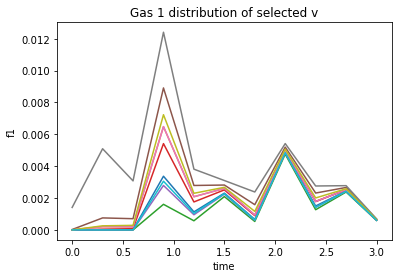

In [60]:
t = np.linspace(0,3,11)
cv = random.sample(range(1, 125), 10)
for i in cv:
    p1 = [f[0][t][i] for t in range(11)]
    plt.plot(t,p1)
plt.xlabel('time')
plt.ylabel('f1')
plt.title('Gas 1 distribution of selected v')
plt.savefig('Gas 1 distribution of selected v')

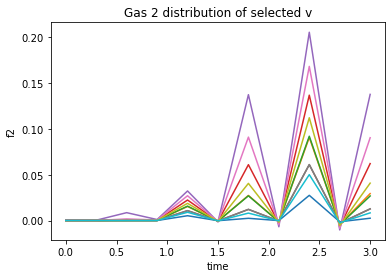

In [61]:
cv = random.sample(range(1, 125), 10)
for i in cv:
    p2 = [f[1][t][i] for t in range(11)]
    plt.plot(t,p2)
plt.xlabel('time')
plt.ylabel('f2')    
plt.title('Gas 2 distribution of selected v')
plt.savefig('Gas 2 distribution of selected v')